In [5]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import math
import smogn

In [6]:
df = pd.read_csv("data/dataset.csv")

In [3]:
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [7]:
unstructured = ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']
categorical = ['explicit', 'mode', 'key', 'time_signature']

clean_df = df.drop_duplicates(subset = "track_id", ignore_index=True).drop(unstructured, axis=1)

In [8]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89741 entries, 0 to 89740
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        89741 non-null  int64  
 1   duration_ms       89741 non-null  int64  
 2   explicit          89741 non-null  bool   
 3   danceability      89741 non-null  float64
 4   energy            89741 non-null  float64
 5   key               89741 non-null  int64  
 6   loudness          89741 non-null  float64
 7   mode              89741 non-null  int64  
 8   speechiness       89741 non-null  float64
 9   acousticness      89741 non-null  float64
 10  instrumentalness  89741 non-null  float64
 11  liveness          89741 non-null  float64
 12  valence           89741 non-null  float64
 13  tempo             89741 non-null  float64
 14  time_signature    89741 non-null  int64  
dtypes: bool(1), float64(9), int64(5)
memory usage: 9.7 MB


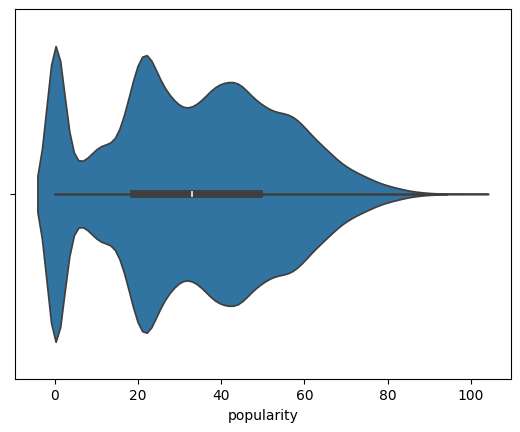

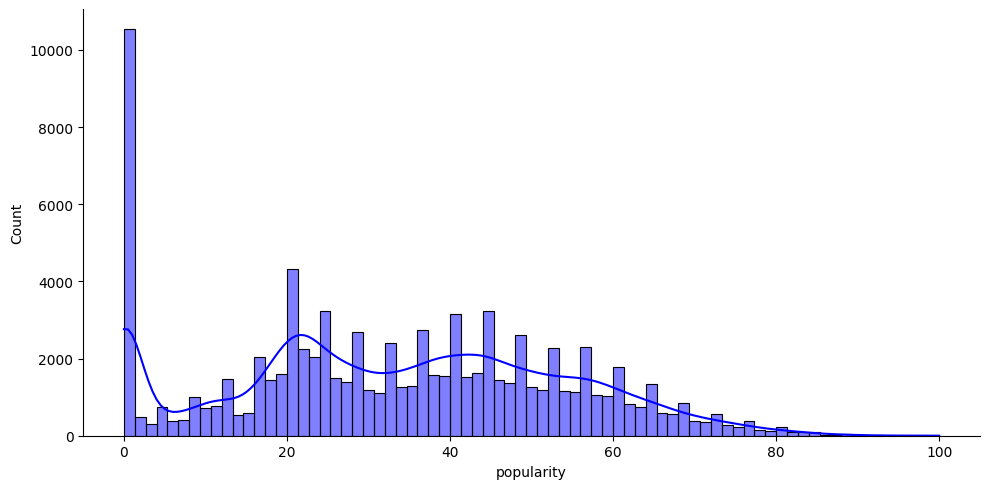

In [6]:
sb.violinplot(x=clean_df['popularity'])
sb.displot(data = clean_df, color='b', x="popularity", kde=True, aspect=2)

In [ ]:
number_of_plots = len(clean_df.columns) - 1
columns = list(clean_df.drop('popularity', axis=1).columns)

fig = make_subplots(rows=number_of_plots, cols=1)

for i in range(number_of_plots):
    fig.append_trace(go.Scattergl(
        x=clean_df[columns[i]], 
        y=clean_df['popularity'], 
        mode='markers',
        marker=dict(
            colorscale='Viridis',
            line_width=1)
        ),
        row=i+1,
        col=1
    )
    fig.update_xaxes(title_text=columns[i], row=i+1, col=1)
    # fig.update_yaxes(title_text='popularity', row=i+1, col=1)
    
fig.update_layout(height=400*number_of_plots, width=1000, title_text="Popularity vs Variables", showlegend=False)
fig.show()

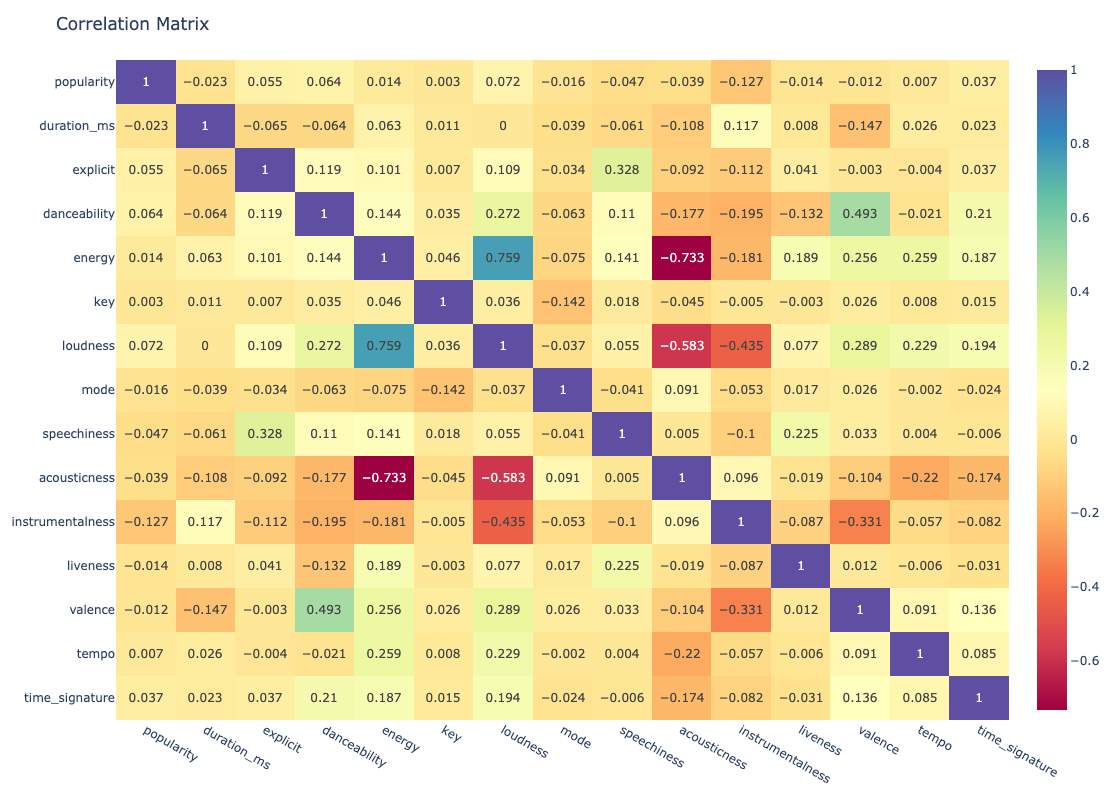

In [8]:
import plotly.express as px

fig = px.imshow(clean_df.corr().round(decimals=3), text_auto=True, aspect="auto", color_continuous_scale='spectral')
fig.update_layout(height=800, width=900, title_text='Correlation Matrix')
fig.show()

In [11]:
clean_df

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,73,230666,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.7150,87.917
1,55,149610,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.2670,77.489
2,57,210826,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.1200,76.332
3,71,201933,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.1430,181.740
4,82,198853,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.1670,119.949
...,...,...,...,...,...,...,...,...,...,...,...
89736,21,384999,0.172,0.2350,-16.393,0.0422,0.6400,0.928000,0.0863,0.0339,125.995
89737,22,385000,0.174,0.1170,-18.318,0.0401,0.9940,0.976000,0.1050,0.0350,85.239
89738,22,271466,0.629,0.3290,-10.895,0.0420,0.8670,0.000000,0.0839,0.7430,132.378
89739,41,283893,0.587,0.5060,-10.889,0.0297,0.3810,0.000000,0.2700,0.4130,135.960


In [58]:
# clean_df = pd.get_dummies(clean_df, columns=categorical, drop_first=True, dtype='int64')
# clean_df = clean_df.drop(categorical, axis=1)
rg_mtrx = [
    [0,  0, 0],  ## over-sample ("minority")
    [100, 1, 0],  ## under-sample
]
smogn_clean_df = smogn.smoter(
    data = clean_df,  ## pandas dataframe
    y = 'popularity',
    samp_method = 'balance',
    # rel_method = 'manual',
    rel_thres = 0.7, 
    # rel_ctrl_pts_rg = rg_mtrx,
)

r_index: 100%|##########| 2210/2210 [00:00<00:00, 2877.52it/s]


In [59]:
smogn_clean_df.shape, clean_df.shape

((87371, 11), (89741, 11))

In [60]:
smogn_clean_df.to_csv("./data/data_smogn_07.csv", index=False)

In [23]:
smogn_clean_df_04 = pd.read_csv('./data/data_smogn_04.csv')
smogn_clean_df_05 = pd.read_csv('./data/data_smogn_05.csv')
# smogn_clean_df = smogn_clean_df[smogn_clean_df['popularity'] <= 100]

In [54]:
smogn_clean_df_035 = pd.read_csv('./data/data_smogn_035.csv')

In [61]:
smogn_clean_df_06 = pd.read_csv('./data/data_smogn_06.csv')

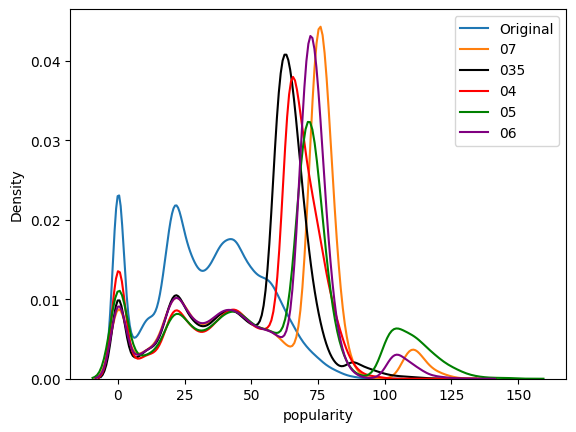

In [62]:
sb.kdeplot(clean_df['popularity'], label = "Original")
sb.kdeplot(smogn_clean_df['popularity'], label = "07")
sb.kdeplot(smogn_clean_df_035['popularity'], label = "035", color='black')
sb.kdeplot(smogn_clean_df_04['popularity'], label = "04", color='r')
sb.kdeplot(smogn_clean_df_05['popularity'], label = "05", color='g')
sb.kdeplot(smogn_clean_df_06['popularity'], label = "06", color='purple')
plt.legend()

<Axes: >

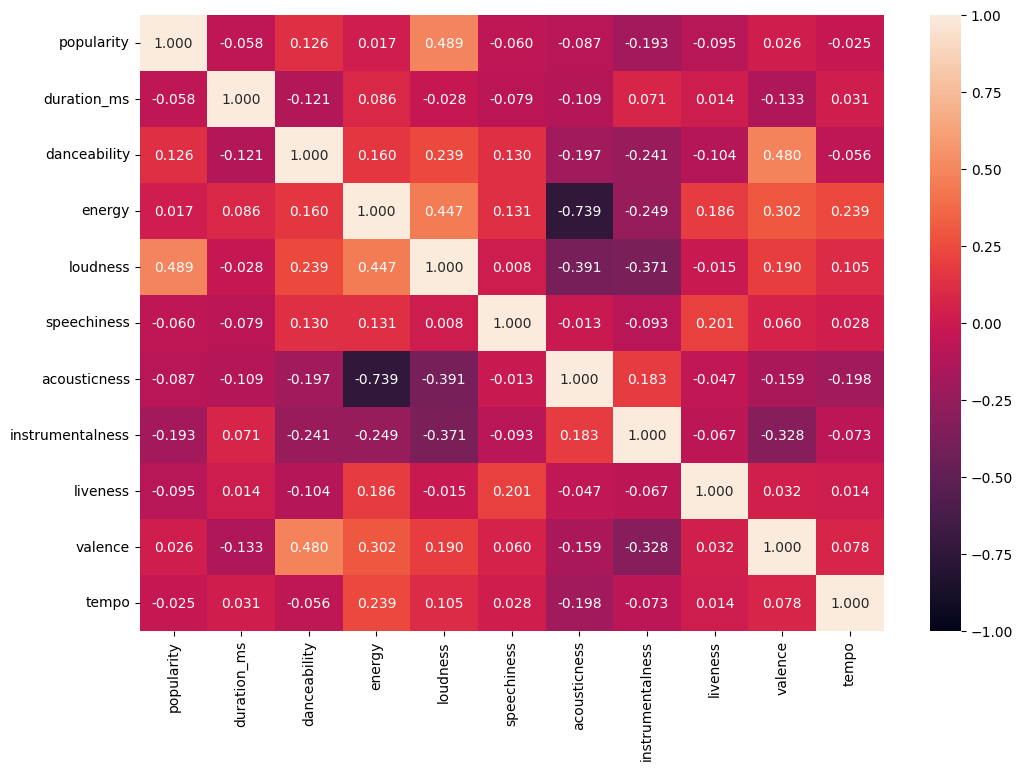

In [34]:
# Correlation between Response and the Predictors
# smogn_clean_df_04 = smogn_clean_df_04.drop(['Unnamed: 0', 'track_id', 'track_genre'], axis=1)
# smogn_clean_df_04

f = plt.figure(figsize=(12, 8))
sb.heatmap(smogn_clean_df.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".3f")

In [39]:
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = smogn_clean_df_05.drop(['popularity'], axis=1)
y = smogn_clean_df_05['popularity']

# smogn_df = pd.read_csv('./data/data_smogn.csv')
# X = smogn_df.drop(['popularity'], axis=1)
# y = smogn_df['popularity']

# Convert 'explicit' from boolean to int (True to 1, False to 0)
# X['explicit'] = X['explicit'].astype(int)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the XGBoost regressor
xgb_regressor = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Train the model on the training data
xgb_regressor.fit(X_train, y_train)

# Predict on the testing data
y_pred = xgb_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

mse, rmse, r2

(319.61067662709144, 17.877658589062815, 0.6896739704338661)

In [25]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor()

regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(), n_estimators=50
)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

mse = mean_squared_error(y_test, y_1)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_1)
print(mse, rmse, r2)

mse = mean_squared_error(y_test, y_2)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_2)
print(mse, rmse, r2)

514.647220154811 22.685837435607507 -0.005986295622226301
293.0811501739283 17.11961302640712 0.42711121515145445


In [80]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(X_train)  
X_train_s = scaler.transform(X_train)  
# apply same transformation to test data
X_test_s = scaler.transform(X_test)  

normalizer = Normalizer()
normalizer.fit(X_train)
X_train_n = normalizer.transform(X_train)
X_test_n = normalizer.transform(X_test)

In [81]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=5, weights='distance')
neigh.fit(X_train_n, y_train)

y_k_pred = neigh.predict(X_test_n)

mse = mean_squared_error(y_test, y_k_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_k_pred)

mse, rmse, r2, neigh.score(X_test_n, y_test)

(437.54019944127026,
 20.917461591724514,
 -0.030707145148357817,
 -0.030707145148357817)

In [19]:
from sklearn.neural_network import MLPRegressor

params = { 'hidden_layer_sizes' : [20,20],
    'activation' : 'relu', 'solver' : 'adam',
    'alpha' : 0.0, 'batch_size' : 10,
    'random_state' : 0, 'tol' : 0.0001,
    'nesterovs_momentum' : False,
    'learning_rate' : 'constant',
    'learning_rate_init' : 0.01,
    'max_iter' : 1000, 'shuffle' : True,
    'n_iter_no_change' : 50, 'verbose' : False }

regr = MLPRegressor(**params)
regr.fit(X_train_s, y_train)
y_pred = regr.predict(X_test_s)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
# sc = regr.score(X_test, y_test)
# acc_train = accuracy(regr, X_train, y_train, 0.10)
# acc_test = accuracy(regr, X_test, y_test, 0.10)

mse, rmse, r2

(422.12043559116745, 20.545569731481468, 0.5886456154094941)

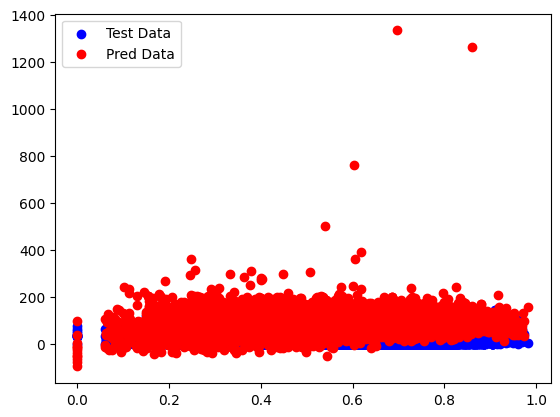

In [77]:
# Plot the training data points
s = 'danceability'
plt.scatter(X_test[s], y_test, label="Test Data", color="blue")
plt.scatter(X_test[s], y_pred, label="Pred Data", color="red")

# Plot the test data points and their predictions
# plt.scatter(X_test[0,:], predictions, label="Test Predictions", color="red", marker="x")

# plt.xlabel("X Values")
# plt.ylabel("Y Values")
plt.legend()
plt.show()

In [106]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim

# Convert the pandas DataFrame and Series into numpy arrays first, then into PyTorch tensors
X_train_tensor = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.float32).view(-1, 1)  # Reshape y_train to match output dimensions
X_test_tensor = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32).view(-1, 1)  # Reshape y_test to match output dimensions

# Creating datasets for PyTorch
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# DataLoader
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Define the RegressionMLP model as before
class RegressionMLP(nn.Module):
    def __init__(self, input_size):
        super(RegressionMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)  # First hidden layer
        self.fc2 = nn.Linear(128, 64)          # Second hidden layer
        self.fc3 = nn.Linear(64, 1)            # Output layer for regression

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  # Linear output for regression
        return x

# Model, loss, and optimizer
model = RegressionMLP(input_size=X_train.shape[1])  # Dynamically set the input size based on X_train
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop (You can define num_epochs as per your requirement)
num_epochs = 60
for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    test_loss = 0
    for inputs, targets in test_loader:
        outputs = model(inputs)
        test_loss += criterion(outputs, targets).item()
    print(f'Test Loss: {test_loss / len(test_loader)}')

Epoch 1, Loss: 1568.464111328125
Epoch 2, Loss: 8912.654296875
Epoch 3, Loss: 1634.8653564453125
Epoch 4, Loss: 1051.8323974609375
Epoch 5, Loss: 19712.02734375
Epoch 6, Loss: 1421.7218017578125
Epoch 7, Loss: 2220.65673828125
Epoch 8, Loss: 1780.159423828125
Epoch 9, Loss: 1175.3111572265625
Epoch 10, Loss: 1700.0587158203125
Epoch 11, Loss: 1615.8294677734375
Epoch 12, Loss: 1029.323974609375
Epoch 13, Loss: 1303.5791015625
Epoch 14, Loss: 1222.1453857421875
Epoch 15, Loss: 1844.362548828125
Epoch 16, Loss: 679.8984375
Epoch 17, Loss: 4052.594482421875
Epoch 18, Loss: 3445.433837890625
Epoch 19, Loss: 3337.278564453125
Epoch 20, Loss: 3091.07861328125
Epoch 21, Loss: 3271.3515625
Epoch 22, Loss: 3716.923583984375
Epoch 23, Loss: 2362.154541015625
Epoch 24, Loss: 2619.284423828125
Epoch 25, Loss: 2624.96875
Epoch 26, Loss: 3075.5927734375
Epoch 27, Loss: 2098.680908203125
Epoch 28, Loss: 2628.16162109375
Epoch 29, Loss: 1277.3621826171875
Epoch 30, Loss: 2048.032958984375
Epoch 31, Lo

In [107]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming you have already predicted the test set with your model and stored in 'y_pred'
# For example:
y_pred_tensor = model(X_test_tensor)
y_pred = y_pred_tensor.detach().numpy().flatten()  # Convert predictions to numpy array and flatten

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 26.646448780004945
Mean Squared Error (MSE): 1038.5662060415636
Root Mean Squared Error (RMSE): 32.226793294424496
R-squared (R²): -0.0023506948207920875


In [108]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import r2_score
import numpy as np
import copy

# Assuming X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor are already defined
X_train_tensor = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.float32).view(-1, 1)  # Reshape y_train to match output dimensions
X_test_tensor = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32).view(-1, 1)  # Reshape y_test to match output dimensions

# Creating datasets for PyTorch
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# DataLoader
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Updated model with dropout for regularization
class ImprovedRegressionMLP(nn.Module):
    def __init__(self, input_size):
        super(ImprovedRegressionMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.dropout1 = nn.Dropout(0.25)
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.25)
        self.fc3 = nn.Linear(64, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

model = ImprovedRegressionMLP(input_size=X_train.shape[1])  # Adjust input_size based on your feature set

# Optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Early stopping setup
early_stopping_patience = 10
min_val_loss = np.inf
patience_counter = 0
best_model = None

# Training loop with early stopping
num_epochs = 100  # Set a higher epoch limit, early stopping will halt if necessary
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=64, shuffle=True):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()
    
    # Validation phase
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs.squeeze(), y_test_tensor).item()
        
    # Check for early stopping
    if val_loss < min_val_loss:
        min_val_loss = val_loss
        patience_counter = 0
        best_model = copy.deepcopy(model)
    else:
        patience_counter += 1
        if patience_counter >= early_stopping_patience:
            print("Stopping early due to no improvement.")
            break

    print(f'Epoch {epoch+1}, Loss: {loss.item()}, Val Loss: {val_loss}')

# Evaluate best model on test set
best_model.eval()
with torch.no_grad():
    y_pred = best_model(X_test_tensor).squeeze().numpy()
    test_r2 = r2_score(y_test_tensor.numpy(), y_pred)

print(f'Test R-squared: {test_r2}')


/opt/homebrew/Cellar/jupyterlab/4.1.5/libexec/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64, 1])) that is different to the input size (torch.Size([64])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/homebrew/Cellar/jupyterlab/4.1.5/libexec/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([39, 1])) that is different to the input size (torch.Size([39])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/homebrew/Cellar/jupyterlab/4.1.5/libexec/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([21274, 1])) that is different to the input size (torch.Size([21274])). This will likely l

Epoch 1, Loss: 3200.52001953125, Val Loss: 2349.295654296875
Epoch 2, Loss: 1706.6646728515625, Val Loss: 1895.57275390625
Epoch 3, Loss: 2383.07958984375, Val Loss: 3261.886962890625
Epoch 4, Loss: 3027.614501953125, Val Loss: 1679.033203125
Epoch 5, Loss: 2328.729736328125, Val Loss: 1730.2467041015625
Epoch 6, Loss: 2654.323486328125, Val Loss: 1635.1002197265625
Epoch 7, Loss: 1903.745361328125, Val Loss: 1682.3028564453125
Epoch 8, Loss: 4258.22900390625, Val Loss: 3813.745849609375
Epoch 9, Loss: 1897.6492919921875, Val Loss: 2200.15771484375
Epoch 10, Loss: 4028.883056640625, Val Loss: 3554.49853515625
Epoch 11, Loss: 3864.181396484375, Val Loss: 3408.028076171875
Epoch 12, Loss: 3141.919677734375, Val Loss: 3278.979736328125
Epoch 13, Loss: 2950.1396484375, Val Loss: 3156.609375
Epoch 14, Loss: 2693.902099609375, Val Loss: 3038.655029296875
Epoch 15, Loss: 3127.40771484375, Val Loss: 2926.9599609375
Stopping early due to no improvement.
Test R-squared: -0.6155869035539401


In [109]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import r2_score
import numpy as np
import copy

# Assuming X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor are already defined

class AdvancedMLP(nn.Module):
    def __init__(self, input_size):
        super(AdvancedMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(64, 1)
    
    def forward(self, x):
        x = self.dropout1(torch.relu(self.bn1(self.fc1(x))))
        x = self.dropout2(torch.relu(self.bn2(self.fc2(x))))
        x = self.fc3(x)
        return x

# Model instantiation
model = AdvancedMLP(input_size=X_train.shape[1])

# Loss function
criterion = nn.MSELoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# DataLoader setup
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=64, shuffle=True)

# Early stopping criteria
early_stopping_patience = 10
min_val_loss = np.inf
patience_counter = 0
best_model_wts = copy.deepcopy(model.state_dict())

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()
    
    # Validation phase
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs.squeeze(), y_test_tensor)
        
    print(f'Epoch {epoch+1}, Loss: {loss.item()}, Val Loss: {val_loss.item()}')
    
    # Early stopping logic
    if val_loss < min_val_loss:
        min_val_loss = val_loss
        best_model_wts = copy.deepcopy(model.state_dict())
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= early_stopping_patience:
            print("Stopping early due to no improvement.")
            model.load_state_dict(best_model_wts)
            break

# Load best model weights
model.load_state_dict(best_model_wts)

# Evaluate on test set
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor).squeeze()
    r2 = r2_score(y_test_tensor.numpy(), predictions.numpy())
    print(f'Test R^2: {r2}')


/opt/homebrew/Cellar/jupyterlab/4.1.5/libexec/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64, 1])) that is different to the input size (torch.Size([64])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/homebrew/Cellar/jupyterlab/4.1.5/libexec/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([39, 1])) that is different to the input size (torch.Size([39])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/homebrew/Cellar/jupyterlab/4.1.5/libexec/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([21274, 1])) that is different to the input size (torch.Size([21274])). This will likely l

Epoch 1, Loss: 1026.0712890625, Val Loss: 1057.5316162109375
Epoch 2, Loss: 939.26904296875, Val Loss: 1072.677490234375
Epoch 3, Loss: 1105.324951171875, Val Loss: 1077.858154296875
Epoch 4, Loss: 937.9179077148438, Val Loss: 1056.6046142578125
Epoch 5, Loss: 1040.2337646484375, Val Loss: 1081.6634521484375
Epoch 6, Loss: 924.3111572265625, Val Loss: 1061.321533203125
Epoch 7, Loss: 1180.969970703125, Val Loss: 1055.686767578125
Epoch 8, Loss: 1253.377685546875, Val Loss: 1047.544921875
Epoch 9, Loss: 1133.3443603515625, Val Loss: 1042.98046875
Epoch 10, Loss: 1189.274658203125, Val Loss: 1042.942626953125
Epoch 11, Loss: 1108.9007568359375, Val Loss: 1040.859375
Epoch 12, Loss: 1072.8948974609375, Val Loss: 1041.2220458984375
Epoch 13, Loss: 874.5620727539062, Val Loss: 1040.0631103515625
Epoch 14, Loss: 1061.4591064453125, Val Loss: 1038.4083251953125
Epoch 15, Loss: 1147.1971435546875, Val Loss: 1037.489013671875
Epoch 16, Loss: 1074.1982421875, Val Loss: 1041.2589111328125
Epoch 1